### Урок 5. Рекуррентные нейронные сети

In [67]:
import pandas as pd
import numpy as np

In [68]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [69]:
from tensorflow import keras
from tensorflow.keras import layers

In [70]:
import numpy as np
from keras.layers import Dense, Activation
from keras.layers import LSTM, GRU
from keras.models import Sequential


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# построчное чтение из примера с текстом 
with open('/content/drive/MyDrive/alice_in_wonderland.txt', 'rb') as _in:
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set([c for c in text])
nb_chars = len(chars)


# создание индекса символов и reverse mapping чтобы передвигаться между значениями numerical
# ID and a specific character. The numerical ID will correspond to a column
# ID и определенный символ. Numerical ID будет соответсвовать колонке
# число при использовании one-hot кодировки для представление входов символов
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 10, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1


# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 128, 128
NUM_ITERATIONS = 25 # 25 должно быть достаточно
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100


# Create a super simple recurrent neural network. There is one recurrent
# layer that produces an embedding of size HIDDEN_SIZE from the one-hot
# encoded input layer. This is followed by a Dense fully-connected layer
# across the set of possible next characters, which is converted to a
# probability score via a standard softmax activation with a multi-class
# cross-entropy loss function linking the prediction to the one-hot
# encoding character label.

'''
Создание очень простой рекуррентной нейронной сети. В ней будет один реккурентный закодированный входной слой. За ним последует полносвязный слой связанный с набором возможных следующих символов, которые конвертированы в вероятностные результаты через стандартную softmax активацию с multi-class cross-encoding loss функцию ссылающуются на предсказание one-hot encoding лейбл символа
'''

model = Sequential()
model.add(
    GRU(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        return_sequences=False,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")


# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):

    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):

        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred
print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Итерация #: 0
1241/1241 [==============================] - 11s 7ms/step - loss: 2.3283
Генерация из посева: distance. 
distance. and the har and the gat in a dore the har and the gat in a dore the har and the gat in a dore the ha==================================================
Итерация #: 1
1241/1241 [==============================] - 9s 7ms/step - loss: 1.9219
Генерация из посева: d his voic
d his voice the was she was she was she was she was she was she was she was she was she was she was she was sh==================================================
Итерация #: 2
1241/1241 [==============================] - 9s 7ms/step - loss: 1.7561
Генерация из посева:  (she had 
 (she had the mouse the mouse the mouse the mouse the mouse the mouse the mouse the mouse the mouse the mouse ==================================================
Итерация #: 3
1241/1241 [==============================] - 8s 7ms/step - loss: 1.6456
Генерация из посева:  it over h
 it over her head the cat of the was the was

### Задание 1

Практическое задание
Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

Пострим нейронную сеть LSTM на тексте Алиса в стране чудес на английском языке

In [73]:
from tensorflow.keras import utils

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

###LSTM с длиной словаря 10000, шириной слоя LSTM 64

In [76]:
data = open('/content/drive/MyDrive/alice_in_wonderland.txt').read()
#Читаем текст
corpus = data.lower().split("\n")

In [77]:
corpus[:10]

['project gutenberg’s alice’s adventures in wonderland, by lewis carroll',
 '',
 'this ebook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  you may copy it, give it away or',
 're-use it under the terms of the project gutenberg license included',
 'with this ebook or online at www.gutenberg.org',
 '',
 '',
 'title: alice’s adventures in wonderland',
 '']

In [78]:
# Создаем объект для токенизации
tokenizer1 = Tokenizer( num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n’')

tokenizer1.fit_on_texts(corpus)
total_words = len(tokenizer1.word_index) + 1  # +1 для символа, который заменяет неизвестные слова

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer1.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [79]:
token_list

[3291, 3, 361, 1277, 3292, 3, 276, 39, 491, 615]

In [84]:
tokenizer1.index_word[33]

'but'

In [85]:
tokenizer1.word_index['but']

33

In [86]:
tokenizer1.word_index['restrictions']

1278

In [87]:
input_sequences[11:15,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  23, 438,  34],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  23, 438,  34,  25],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  23, 438,  34,  25,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  23, 438,  34,  25,   1, 155]], dtype=int32)

In [88]:
label.shape

(27822, 3293)

In [89]:
callback = EarlyStopping(monitor='val_accuracy', patience=5) # создаем обратный вызов - callback - тут "Ранний останов"

In [92]:
model1 = Sequential()
model1.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 10) координат - он плотный

model1.add(LSTM(64))
model1.add(Dropout( 0.2))
model1.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dense(total_words, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 19, 256)           843008    
                                                                 
 lstm_4 (LSTM)               (None, 64)                82176     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1646)              106990    
                                                                 
 dense_11 (Dense)            (None, 3293)              5423571   
                                                                 
Total params: 6,455,745
Trainable params: 6,455,745
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
history1 = model1.fit(predictors, label, epochs=100, validation_split=0.2, callbacks=[callback],verbose=1)

Epoch 1/100
696/696 [==============================] - 7s 8ms/step - loss: 6.2958 - accuracy: 0.0556 - val_loss: 6.9632 - val_accuracy: 0.0728
Epoch 2/100
696/696 [==============================] - 5s 7ms/step - loss: 5.8818 - accuracy: 0.0588 - val_loss: 7.3456 - val_accuracy: 0.0730
Epoch 3/100
696/696 [==============================] - 5s 7ms/step - loss: 5.6329 - accuracy: 0.0682 - val_loss: 7.3418 - val_accuracy: 0.0809
Epoch 4/100
696/696 [==============================] - 5s 7ms/step - loss: 5.3843 - accuracy: 0.0944 - val_loss: 7.5168 - val_accuracy: 0.0958
Epoch 5/100
696/696 [==============================] - 5s 7ms/step - loss: 5.1730 - accuracy: 0.1118 - val_loss: 7.7375 - val_accuracy: 0.0915
Epoch 6/100
696/696 [==============================] - 5s 7ms/step - loss: 5.0065 - accuracy: 0.1226 - val_loss: 7.8308 - val_accuracy: 0.0960
Epoch 7/100
696/696 [==============================] - 5s 7ms/step - loss: 4.8617 - accuracy: 0.1371 - val_loss: 8.0196 - val_accuracy: 0.1004

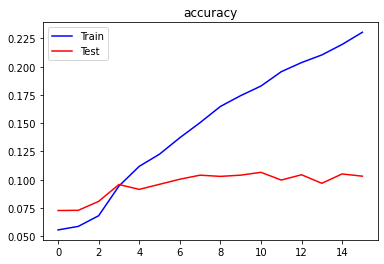

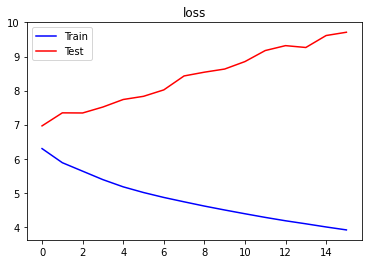

In [94]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
acc_v = history1.history['val_accuracy']
loss = history1.history['loss']
loss_v = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Train')
plt.plot(epochs, acc_v, 'r', label='Test')
plt.legend()
plt.title('accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Train')
plt.plot(epochs, loss_v, 'r', label='Test')
plt.title('loss')
plt.legend()

plt.show()


In [95]:
# начальная строка
seed_text = "If ever you disturb our streets again,"
#seed_text = "machine learning is true"
next_words = 10
# строим последовательность + новое предсказание  
for _ in range(next_words):
  # текущая последовательность (токенизация и дополнение)
  token_list = tokenizer1.texts_to_sequences([seed_text])[0]
  print(token_list)
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre')
  # делаем предсказание (сразу как индекс класса - у нас 1 из 3211)
  predicted = model1.predict(token_list, verbose=0)
  predict_ = np.argmax(predicted)
  output_word = ""
  print(predict_)
  # добавим новое слово в последовательность
  for word, index in tokenizer1.word_index.items():
    if index == predict_:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

[43, 217, 9, 361, 54]
8
[43, 217, 9, 361, 54, 8]
1
[43, 217, 9, 361, 54, 8, 1]
125
[43, 217, 9, 361, 54, 8, 1, 125]
26
[43, 217, 9, 361, 54, 8, 1, 125, 26]
91
[43, 217, 9, 361, 54, 8, 1, 125, 26, 91]
20
[43, 217, 9, 361, 54, 8, 1, 125, 26, 91, 20]
48
[43, 217, 9, 361, 54, 8, 1, 125, 26, 91, 20, 48]
40
[43, 217, 9, 361, 54, 8, 1, 125, 26, 91, 20, 48, 40]
12
[43, 217, 9, 361, 54, 8, 1, 125, 26, 91, 20, 48, 40, 12]
75
If ever you disturb our streets again, said the duchess ‘i don t know what i m


In [96]:
y_p=model1.predict(token_list)

1/1 [==============================] - 0s 19ms/step


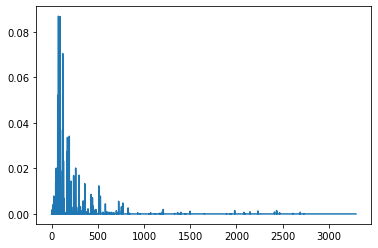

In [97]:
plt.plot(y_p[0,:])

In [98]:
ind_prob=np.where(y_p[0,:]>0.015)[0]
ind_prob

array([ 48,  51,  57,  67,  75,  83,  91,  94,  96, 119, 121, 129, 168,
       172, 192, 239, 261, 297])

In [99]:
for i,ind in enumerate(ind_prob.tolist()):
  print(tokenizer1.index_word[ind], ' : ', y_p[0,i])

know  :  2.9202185e-10
were  :  7.314981e-05
have  :  0.0004398846
can  :  0.0017314368
m  :  3.7410107e-05
ll  :  4.620448e-05
don  :  4.5834906e-05
must  :  5.7803434e-05
think  :  0.0012429254
never  :  0.00029071033
ve  :  2.1163348e-06
re  :  0.0012274238
d  :  0.0008502002
should  :  0.0039557894
shall  :  4.641105e-06
wonder  :  4.889942e-06
am  :  4.0118866e-06
didn  :  2.9665787e-06


###  LSTM с длиной словаря 10000, шириной слоя LSTM 256

In [100]:
data = open('/content/drive/MyDrive/alice_in_wonderland.txt').read()
#Читаем текст
corpus = data.lower().split("\n")

In [101]:
# Создаем объект для токенизации
tokenizer5 = Tokenizer( num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n’')

tokenizer5.fit_on_texts(corpus)
total_words = len(tokenizer5.word_index) + 1  # +1 для символа, который заменяет неизвестные слова

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer5.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [102]:
label.shape

(27822, 3293)

In [103]:
callback = EarlyStopping(monitor='val_accuracy', patience=5) # создаем обратный вызов - callback - тут "Ранний останов"

In [104]:
model5 = Sequential()
model5.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 10) координат - он плотный

model5.add(LSTM(256))
model5.add(Dropout( 0.2))
model5.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model5.add(Dense(total_words, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model5.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 19, 256)           843008    
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 1646)              423022    
                                                                 
 dense_13 (Dense)            (None, 3293)              5423571   
                                                                 
Total params: 7,214,913
Trainable params: 7,214,913
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
history5 = model5.fit(predictors, label, epochs=100, validation_split=0.2, callbacks=[callback],verbose=1)

Epoch 1/100
696/696 [==============================] - 8s 9ms/step - loss: 6.4108 - accuracy: 0.0548 - val_loss: 6.9975 - val_accuracy: 0.0728
Epoch 2/100
696/696 [==============================] - 5s 8ms/step - loss: 5.9099 - accuracy: 0.0588 - val_loss: 7.2468 - val_accuracy: 0.0737
Epoch 3/100
696/696 [==============================] - 5s 8ms/step - loss: 5.6542 - accuracy: 0.0785 - val_loss: 7.4503 - val_accuracy: 0.0913
Epoch 4/100
696/696 [==============================] - 5s 8ms/step - loss: 5.3742 - accuracy: 0.1029 - val_loss: 7.5841 - val_accuracy: 0.0909
Epoch 5/100
696/696 [==============================] - 6s 8ms/step - loss: 5.1614 - accuracy: 0.1192 - val_loss: 7.6785 - val_accuracy: 0.1030
Epoch 6/100
696/696 [==============================] - 5s 8ms/step - loss: 5.0014 - accuracy: 0.1323 - val_loss: 7.9856 - val_accuracy: 0.0956
Epoch 7/100
696/696 [==============================] - 5s 8ms/step - loss: 4.8541 - accuracy: 0.1444 - val_loss: 8.2090 - val_accuracy: 0.0956

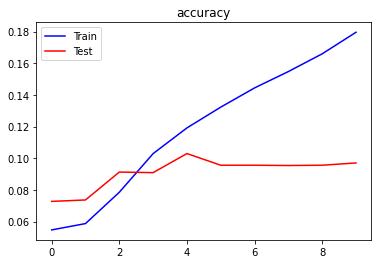

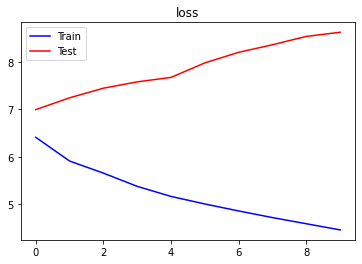

In [106]:
import matplotlib.pyplot as plt
acc = history5.history['accuracy']
acc_v = history5.history['val_accuracy']
loss = history5.history['loss']
loss_v = history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Train')
plt.plot(epochs, acc_v, 'r', label='Test')
plt.legend()
plt.title('accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Train')
plt.plot(epochs, loss_v, 'r', label='Test')
plt.title('loss')
plt.legend()

plt.show()

In [107]:
# начальная строка
seed_text = "If ever you disturb our streets again,"
#seed_text = "machine learning is true"
next_words = 10
# строим последовательность + новое предсказание  
for _ in range(next_words):
  # текущая последовательность (токенизация и дополнение)
  token_list = tokenizer5.texts_to_sequences([seed_text])[0]
  print(token_list)
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre')
  # делаем предсказание (сразу как индекс класса - у нас 1 из 3211)
  predicted = model5.predict(token_list, verbose=0)
  predict_ = np.argmax(predicted)
  output_word = ""
  print(predict_)
  # добавим новое слово в последовательность
  for word, index in tokenizer5.word_index.items():
    if index == predict_:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

[43, 217, 9, 361, 54]
8
[43, 217, 9, 361, 54, 8]
1
[43, 217, 9, 361, 54, 8, 1]
92
[43, 217, 9, 361, 54, 8, 1, 92]
5
[43, 217, 9, 361, 54, 8, 1, 92, 5]
1
[43, 217, 9, 361, 54, 8, 1, 92, 5, 1]
35
[43, 217, 9, 361, 54, 8, 1, 92, 5, 1, 35]
111
[43, 217, 9, 361, 54, 8, 1, 92, 5, 1, 35, 111]
2
[43, 217, 9, 361, 54, 8, 1, 92, 5, 1, 35, 111, 2]
7
[43, 217, 9, 361, 54, 8, 1, 92, 5, 1, 35, 111, 2, 7]
13
If ever you disturb our streets again, said the gryphon of the little thing and she was


In [108]:
y_p=model5.predict(token_list)

1/1 [==============================] - 0s 19ms/step


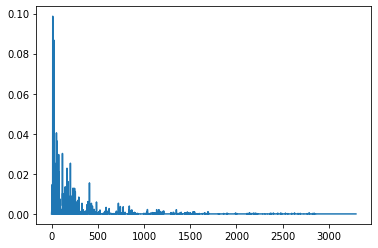

In [109]:
plt.plot(y_p[0,:])

In [110]:
ind_prob=np.where(y_p[0,:]>0.02)[0]
ind_prob

array([ 13,  19,  24,  51,  53,  59,  65,  77,  80, 118, 167, 204])

In [111]:
for i,ind in enumerate(ind_prob.tolist()):
  print(tokenizer5.index_word[ind], ' : ', y_p[0,i])

was  :  4.2172724e-10
s  :  0.0008569688
had  :  0.0017257401
were  :  0.0021720778
went  :  0.0004636915
could  :  0.00020532717
thought  :  8.324773e-05
did  :  0.00058726466
began  :  0.01468744
looked  :  4.9636466e-05
heard  :  0.00024382742
felt  :  0.00038520957


### LSTM с длиной словаря 10000, шириной слоя LSTM 128

In [112]:
data = open('/content/drive/MyDrive/alice_in_wonderland.txt').read()
#Читаем текст
corpus = data.lower().split("\n")

In [113]:
# Создаем объект для токенизации
tokenizer6 = Tokenizer( num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n’')

tokenizer6.fit_on_texts(corpus)
total_words = len(tokenizer5.word_index) + 1  # +1 для символа, который заменяет неизвестные слова

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer6.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [114]:
label.shape

(27822, 3293)

In [115]:
callback = EarlyStopping(monitor='val_accuracy', patience=5) # создаем обратный вызов - callback - тут "Ранний останов"

In [116]:
model6 = Sequential()
model6.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 10) координат - он плотный

model6.add(LSTM(128))
model6.add(Dropout( 0.2))
model6.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model6.add(Dense(total_words, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model6.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 19, 256)           843008    
                                                                 
 lstm_6 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1646)              212334    
                                                                 
 dense_15 (Dense)            (None, 3293)              5423571   
                                                                 
Total params: 6,676,033
Trainable params: 6,676,033
Non-trainable params: 0
_________________________________________________________________
None


In [117]:
history6 = model6.fit(predictors, label, epochs=100, validation_split=0.2, callbacks=[callback],verbose=1)

Epoch 1/100
696/696 [==============================] - 7s 8ms/step - loss: 6.3236 - accuracy: 0.0546 - val_loss: 7.0176 - val_accuracy: 0.0728
Epoch 2/100
696/696 [==============================] - 5s 8ms/step - loss: 5.9053 - accuracy: 0.0588 - val_loss: 7.2937 - val_accuracy: 0.0737
Epoch 3/100
696/696 [==============================] - 5s 7ms/step - loss: 5.6537 - accuracy: 0.0725 - val_loss: 7.3250 - val_accuracy: 0.0837
Epoch 4/100
696/696 [==============================] - 7s 10ms/step - loss: 5.3645 - accuracy: 0.1012 - val_loss: 7.3239 - val_accuracy: 0.0972
Epoch 5/100
696/696 [==============================] - 7s 10ms/step - loss: 5.1294 - accuracy: 0.1196 - val_loss: 7.7000 - val_accuracy: 0.0979
Epoch 6/100
696/696 [==============================] - 6s 9ms/step - loss: 4.9446 - accuracy: 0.1387 - val_loss: 7.9299 - val_accuracy: 0.1046
Epoch 7/100
696/696 [==============================] - 6s 9ms/step - loss: 4.7845 - accuracy: 0.1527 - val_loss: 7.9624 - val_accuracy: 0.10

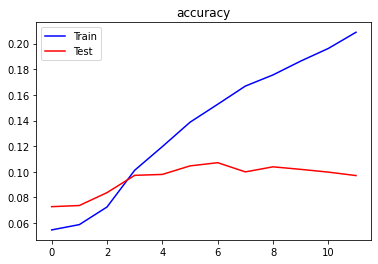

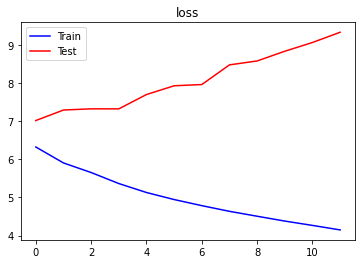

In [118]:
import matplotlib.pyplot as plt
acc = history6.history['accuracy']
acc_v = history6.history['val_accuracy']
loss = history6.history['loss']
loss_v = history6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Train')
plt.plot(epochs, acc_v, 'r', label='Test')
plt.legend()
plt.title('accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Train')
plt.plot(epochs, loss_v, 'r', label='Test')
plt.title('loss')
plt.legend()

plt.show()

In [119]:
# начальная строка
seed_text = "If ever you disturb our streets again,"
#seed_text = "machine learning is true"
next_words = 10
# строим последовательность + новое предсказание  
for _ in range(next_words):
  # текущая последовательность (токенизация и дополнение)
  token_list = tokenizer6.texts_to_sequences([seed_text])[0]
  print(token_list)
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre')
  # делаем предсказание (сразу как индекс класса - у нас 1 из 3211)
  predicted = model6.predict(token_list, verbose=0)
  predict_ = np.argmax(predicted)
  output_word = ""
  print(predict_)
  # добавим новое слово в последовательность
  for word, index in tokenizer6.word_index.items():
    if index == predict_:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

[43, 217, 9, 361, 54]
8
[43, 217, 9, 361, 54, 8]
1
[43, 217, 9, 361, 54, 8, 1]
92
[43, 217, 9, 361, 54, 8, 1, 92]
26
[43, 217, 9, 361, 54, 8, 1, 92, 26]
75
[43, 217, 9, 361, 54, 8, 1, 92, 26, 75]
4
[43, 217, 9, 361, 54, 8, 1, 92, 26, 75, 4]
35
[43, 217, 9, 361, 54, 8, 1, 92, 26, 75, 4, 35]
111
[43, 217, 9, 361, 54, 8, 1, 92, 26, 75, 4, 35, 111]
12
[43, 217, 9, 361, 54, 8, 1, 92, 26, 75, 4, 35, 111, 12]
75
If ever you disturb our streets again, said the gryphon ‘i m a little thing i m


In [120]:
y_p=model6.predict(token_list)

1/1 [==============================] - 0s 18ms/step


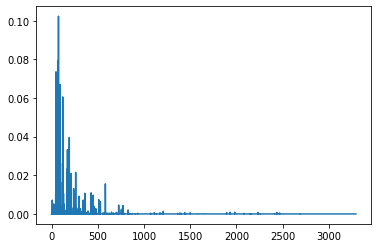

In [121]:
plt.plot(y_p[0,:])

In [122]:
ind_prob=np.where(y_p[0,:]>0.02)[0]
ind_prob

array([ 48,  67,  75,  83,  91,  96, 121, 168, 172, 192, 211, 261])

In [123]:
for i,ind in enumerate(ind_prob.tolist()):
  print(tokenizer6.index_word[ind], ' : ', y_p[0,i])

know  :  1.4609033e-10
can  :  0.00029823784
m  :  0.00026539434
ll  :  0.0032434573
don  :  0.0002517695
think  :  0.00011455123
ve  :  0.00026538194
d  :  3.2117878e-05
should  :  0.0071128057
shall  :  0.00042392756
wish  :  4.094092e-06
am  :  0.00019886276


###  LSTM с длиной словаря 10000, шириной слоя LSTM 10

In [124]:
data = open('/content/drive/MyDrive/alice_in_wonderland.txt').read()
#Читаем текст
corpus = data.lower().split("\n")

In [125]:
# Создаем объект для токенизации
tokenizer4 = Tokenizer( num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n’')

tokenizer4.fit_on_texts(corpus)
total_words = len(tokenizer4.word_index) + 1  # +1 для символа, который заменяет неизвестные слова

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer4.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [126]:
label.shape

(27822, 3293)

In [127]:
callback = EarlyStopping(monitor='val_accuracy', patience=5) # создаем обратный вызов - callback - тут "Ранний останов"

In [129]:
model4 = Sequential()
model4.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 10) координат - он плотный

model4.add(LSTM(10))
model4.add(Dropout( 0.2))
model4.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model4.add(Dense(total_words, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 19, 256)           843008    
                                                                 
 lstm_8 (LSTM)               (None, 10)                10680     
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_18 (Dense)            (None, 1646)              18106     
                                                                 
 dense_19 (Dense)            (None, 3293)              5423571   
                                                                 
Total params: 6,295,365
Trainable params: 6,295,365
Non-trainable params: 0
_________________________________________________________________
None


In [130]:
history4 = model4.fit(predictors, label, epochs=100, validation_split=0.2, callbacks=[callback],verbose=1)

Epoch 1/100
696/696 [==============================] - 7s 8ms/step - loss: 6.2759 - accuracy: 0.0557 - val_loss: 7.1255 - val_accuracy: 0.0731
Epoch 2/100
696/696 [==============================] - 5s 7ms/step - loss: 5.8446 - accuracy: 0.0592 - val_loss: 7.1784 - val_accuracy: 0.0730
Epoch 3/100
696/696 [==============================] - 6s 9ms/step - loss: 5.6627 - accuracy: 0.0635 - val_loss: 7.3404 - val_accuracy: 0.0699
Epoch 4/100
696/696 [==============================] - 5s 7ms/step - loss: 5.5190 - accuracy: 0.0768 - val_loss: 7.5536 - val_accuracy: 0.0706
Epoch 5/100
696/696 [==============================] - 5s 7ms/step - loss: 5.4050 - accuracy: 0.0868 - val_loss: 7.7039 - val_accuracy: 0.0823
Epoch 6/100
696/696 [==============================] - 6s 9ms/step - loss: 5.3134 - accuracy: 0.0953 - val_loss: 7.6493 - val_accuracy: 0.0836
Epoch 7/100
696/696 [==============================] - 5s 7ms/step - loss: 5.2384 - accuracy: 0.1007 - val_loss: 7.6432 - val_accuracy: 0.0938

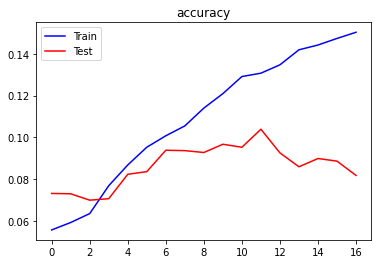

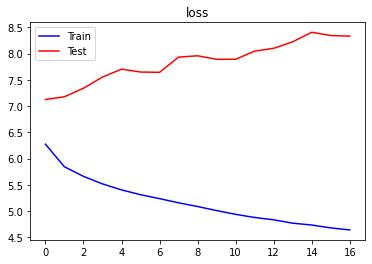

In [131]:
import matplotlib.pyplot as plt
acc = history4.history['accuracy']
acc_v = history4.history['val_accuracy']
loss = history4.history['loss']
loss_v = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Train')
plt.plot(epochs, acc_v, 'r', label='Test')
plt.legend()
plt.title('accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Train')
plt.plot(epochs, loss_v, 'r', label='Test')
plt.title('loss')
plt.legend()

plt.show()


In [132]:
# начальная строка
seed_text = "If ever you disturb our streets again,"
#seed_text = "machine learning is true"
next_words = 10
# строим последовательность + новое предсказание  
for _ in range(next_words):
  # текущая последовательность (токенизация и дополнение)
  token_list = tokenizer4.texts_to_sequences([seed_text])[0]
  print(token_list)
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre')
  # делаем предсказание (сразу как индекс класса - у нас 1 из 3211)
  predicted = model4.predict(token_list, verbose=0)
  predict_ = np.argmax(predicted)
  output_word = ""
  print(predict_)
  # добавим новое слово в последовательность
  for word, index in tokenizer4.word_index.items():
    if index == predict_:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

[43, 217, 9, 361, 54]
5
[43, 217, 9, 361, 54, 5]
1
[43, 217, 9, 361, 54, 5, 1]
35
[43, 217, 9, 361, 54, 5, 1, 35]
35
[43, 217, 9, 361, 54, 5, 1, 35, 35]
115
[43, 217, 9, 361, 54, 5, 1, 35, 35, 115]
2
[43, 217, 9, 361, 54, 5, 1, 35, 35, 115, 2]
4
[43, 217, 9, 361, 54, 5, 1, 35, 35, 115, 2, 4]
35
[43, 217, 9, 361, 54, 5, 1, 35, 35, 115, 2, 4, 35]
115
[43, 217, 9, 361, 54, 5, 1, 35, 35, 115, 2, 4, 35, 115]
2
If ever you disturb our streets again, of the little little voice and a little voice and


In [133]:
y_p=model4.predict(token_list)

1/1 [==============================] - 0s 16ms/step


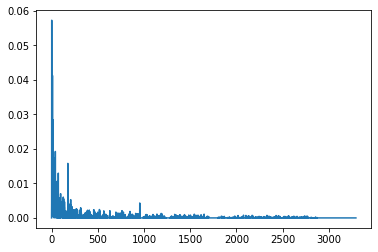

In [134]:
plt.plot(y_p[0,:])

In [135]:
ind_prob=np.where(y_p[0,:]>0.015)[0]
ind_prob

array([  2,   7,  10,  15,  18,  26,  37,  41, 176])

In [136]:
for i,ind in enumerate(ind_prob.tolist()):
  print(tokenizer4.index_word[ind], ' : ', y_p[0,i])

and  :  2.2082913e-08
she  :  0.0042673587
in  :  0.0572908
as  :  0.009234331
at  :  0.007879611
‘i  :  0.005671334
out  :  0.0064000976
up  :  0.020965202
away  :  0.008826127


###  LSTM с длиной словаря 300, шириной слоя LSTM 64

In [137]:
data = open('/content/drive/MyDrive/alice_in_wonderland.txt').read()
#Читаем текст
corpus = data.lower().split("\n")

In [138]:
# Создаем объект для токенизации
tokenizer2 = Tokenizer( num_words=300, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n’')

tokenizer2.fit_on_texts(corpus)
total_words = len(tokenizer2.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer2.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [139]:
label.shape

(19725, 3293)

In [140]:
callback = EarlyStopping(monitor='val_accuracy', patience=5) # создаем обратный вызов - calback - тут "Ранний останов"

In [141]:
model2 = Sequential()
model2.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 10) координат - он плотный
#model.add(Bidirectional(LSTM(50, return_sequences = True)))

model2.add(LSTM(64))
model2.add(Dropout( 0.2))
model2.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(total_words, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 17, 256)           843008    
                                                                 
 lstm_9 (LSTM)               (None, 64)                82176     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 1646)              106990    
                                                                 
 dense_21 (Dense)            (None, 3293)              5423571   
                                                                 
Total params: 6,455,745
Trainable params: 6,455,745
Non-trainable params: 0
_________________________________________________________________
None


In [142]:
history2 = model2.fit(predictors, label, epochs=100, validation_split=0.2, callbacks=[callback],verbose=1)

Epoch 1/100
494/494 [==============================] - 6s 9ms/step - loss: 5.1781 - accuracy: 0.0726 - val_loss: 5.4001 - val_accuracy: 0.1103
Epoch 2/100
494/494 [==============================] - 5s 9ms/step - loss: 4.8066 - accuracy: 0.0770 - val_loss: 5.2987 - val_accuracy: 0.1093
Epoch 3/100
494/494 [==============================] - 3s 7ms/step - loss: 4.6692 - accuracy: 0.0889 - val_loss: 5.1746 - val_accuracy: 0.1153
Epoch 4/100
494/494 [==============================] - 4s 8ms/step - loss: 4.5651 - accuracy: 0.1008 - val_loss: 5.1760 - val_accuracy: 0.1262
Epoch 5/100
494/494 [==============================] - 4s 7ms/step - loss: 4.4521 - accuracy: 0.1153 - val_loss: 5.1405 - val_accuracy: 0.1346
Epoch 6/100
494/494 [==============================] - 3s 7ms/step - loss: 4.3398 - accuracy: 0.1292 - val_loss: 5.0785 - val_accuracy: 0.1427
Epoch 7/100
494/494 [==============================] - 4s 9ms/step - loss: 4.2582 - accuracy: 0.1352 - val_loss: 5.0198 - val_accuracy: 0.1387

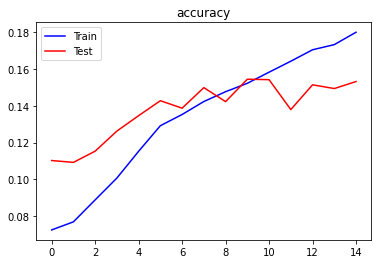

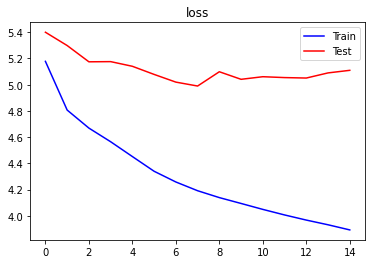

In [143]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
acc_v = history2.history['val_accuracy']
loss = history2.history['loss']
loss_v = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Train')
plt.plot(epochs, acc_v, 'r', label='Test')
plt.legend()
plt.title('accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Train')
plt.plot(epochs, loss_v, 'r', label='Test')
plt.title('loss')
plt.legend()

plt.show()

In [144]:
# начальная строка
seed_text = "If ever you disturb our streets again,"
#seed_text = "machine learning is true"
next_words = 10
# строим последовательность + новое предсказание  
for _ in range(next_words):
  # текущая последовательность (токенизация и дополнение)
  token_list = tokenizer2.texts_to_sequences([seed_text])[0]
  print(token_list)
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre')
  # делаем предсказание (сразу как индекс класса - у нас 1 из 3211)
  predicted = model2.predict(token_list, verbose=0)
  predict_ = np.argmax(predicted)
  output_word = ""
  print(predict_)
  # добавим новое слово в последовательность
  for word, index in tokenizer2.word_index.items():
    if index == predict_:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

[43, 217, 9, 54]
8
[43, 217, 9, 54, 8]
11
[43, 217, 9, 54, 8, 11]
2
[43, 217, 9, 54, 8, 11, 2]
1
[43, 217, 9, 54, 8, 11, 2, 1]
64
[43, 217, 9, 54, 8, 11, 2, 1, 64]
13
[43, 217, 9, 54, 8, 11, 2, 1, 64, 13]
4
[43, 217, 9, 54, 8, 11, 2, 1, 64, 13, 4]
35
[43, 217, 9, 54, 8, 11, 2, 1, 64, 13, 4, 35]
5
[43, 217, 9, 54, 8, 11, 2, 1, 64, 13, 4, 35, 5]
1
If ever you disturb our streets again, said alice and the queen was a little of the


In [145]:
y_p=model2.predict(token_list)

1/1 [==============================] - 0s 18ms/step


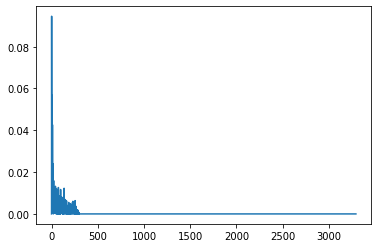

In [146]:
plt.plot(y_p[0,:])

In [147]:
ind_prob=np.where(y_p[0,:]>0.015)[0]
ind_prob

array([ 1,  2,  4,  5,  6, 10, 14, 16, 18, 23])

In [148]:
for i,ind in enumerate(ind_prob.tolist()):
  print(tokenizer2.index_word[ind], ' : ', y_p[0,i])

the  :  2.533131e-08
and  :  0.09455818
a  :  0.055797856
of  :  0.012986081
it  :  0.05676492
in  :  0.035787743
that  :  0.026875667
her  :  0.008009101
at  :  0.008190352
this  :  0.0023274026


LSTM с длиной словаря 100000, шириной слоя LSTM 64

In [149]:
data = open('/content/drive/MyDrive/alice_in_wonderland.txt').read()
#Читаем текст
corpus = data.lower().split("\n")

In [150]:
# Создаем объект для токенизации
tokenizer3 = Tokenizer( num_words=100000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n’')

tokenizer3.fit_on_texts(corpus)
total_words = len(tokenizer3.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer3.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)


In [151]:
label.shape

(27822, 3293)

In [152]:
callback = EarlyStopping(monitor='val_accuracy', patience=5) # создаем обратный вызов - calback - тут "Ранний останов"

In [153]:
model3 = Sequential()
model3.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 10) координат - он плотный
#model.add(Bidirectional(LSTM(50, return_sequences = True)))

model3.add(LSTM(64))
model3.add(Dropout( 0.2))
model3.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dense(total_words, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model3.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 19, 256)           843008    
                                                                 
 lstm_10 (LSTM)              (None, 64)                82176     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 1646)              106990    
                                                                 
 dense_23 (Dense)            (None, 3293)              5423571   
                                                                 
Total params: 6,455,745
Trainable params: 6,455,745
Non-trainable params: 0
_________________________________________________________________
None


In [154]:
history3 = model3.fit(predictors, label, epochs=100, validation_split=0.2, callbacks=[callback],verbose=1)

Epoch 1/100
696/696 [==============================] - 8s 8ms/step - loss: 6.2826 - accuracy: 0.0544 - val_loss: 6.9880 - val_accuracy: 0.0728
Epoch 2/100
696/696 [==============================] - 5s 7ms/step - loss: 5.8947 - accuracy: 0.0591 - val_loss: 7.3621 - val_accuracy: 0.0730
Epoch 3/100
696/696 [==============================] - 5s 7ms/step - loss: 5.6433 - accuracy: 0.0740 - val_loss: 7.3354 - val_accuracy: 0.0800
Epoch 4/100
696/696 [==============================] - 5s 7ms/step - loss: 5.3670 - accuracy: 0.0994 - val_loss: 7.5495 - val_accuracy: 0.0940
Epoch 5/100
696/696 [==============================] - 5s 7ms/step - loss: 5.1564 - accuracy: 0.1147 - val_loss: 7.5740 - val_accuracy: 0.0956
Epoch 6/100
696/696 [==============================] - 5s 7ms/step - loss: 4.9892 - accuracy: 0.1277 - val_loss: 8.0769 - val_accuracy: 0.0898
Epoch 7/100
696/696 [==============================] - 5s 7ms/step - loss: 4.8521 - accuracy: 0.1388 - val_loss: 7.9997 - val_accuracy: 0.0963

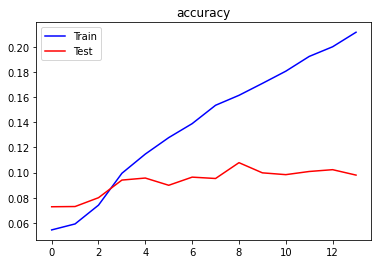

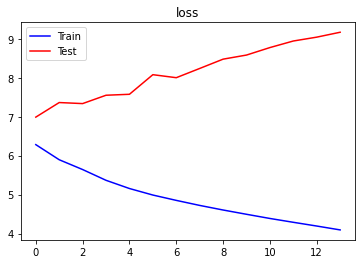

In [155]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
acc_v = history3.history['val_accuracy']
loss = history3.history['loss']
loss_v = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Train')
plt.plot(epochs, acc_v, 'r', label='Test')
plt.legend()
plt.title('accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Train')
plt.plot(epochs, loss_v, 'r', label='Test')
plt.title('loss')
plt.legend()

plt.show()

In [156]:
# начальная строка
seed_text = "If ever you disturb our streets again,"
#seed_text = "machine learning is true"
next_words = 10
# строим последовательность + новое предсказание  
for _ in range(next_words):
  # текущая последовательность (токенизация и дополнение)
  token_list = tokenizer3.texts_to_sequences([seed_text])[0]
  print(token_list)
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre')
  # делаем предсказание (сразу как индекс класса - у нас 1 из 3211)
  predicted = model3.predict(token_list, verbose=0)
  predict_ = np.argmax(predicted)
  output_word = ""
  print(predict_)
  # добавим новое слово в последовательность
  for word, index in tokenizer3.word_index.items():
    if index == predict_:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

[43, 217, 9, 361, 54]
12
[43, 217, 9, 361, 54, 12]
91
[43, 217, 9, 361, 54, 12, 91]
20
[43, 217, 9, 361, 54, 12, 91, 20]
48
[43, 217, 9, 361, 54, 12, 91, 20, 48]
40
[43, 217, 9, 361, 54, 12, 91, 20, 48, 40]
9
[43, 217, 9, 361, 54, 12, 91, 20, 48, 40, 9]
67
[43, 217, 9, 361, 54, 12, 91, 20, 48, 40, 9, 67]
20
[43, 217, 9, 361, 54, 12, 91, 20, 48, 40, 9, 67, 20]
45
[43, 217, 9, 361, 54, 12, 91, 20, 48, 40, 9, 67, 20, 45]
70
If ever you disturb our streets again, i don t know what you can t do me


In [157]:
y_p=model3.predict(token_list)

1/1 [==============================] - 0s 16ms/step


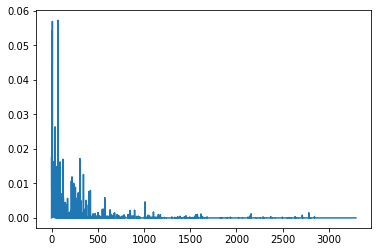

In [158]:
plt.plot(y_p[0,:])

In [160]:
ind_prob=np.where(y_p[0,:]>0.002)[0]
ind_prob

array([   1,    2,    3,    4,    5,    6,    8,    9,   11,   12,   14,
         16,   17,   18,   20,   21,   22,   23,   25,   28,   30,   31,
         32,   33,   37,   38,   40,   42,   43,   45,   47,   52,   61,
         63,   69,   70,   73,   86,   89,   93,   98,  100,  101,  102,
        105,  108,  110,  112,  114,  116,  124,  126,  128,  149,  151,
        157,  160,  163,  165,  173,  214,  215,  221,  229,  232,  236,
        240,  245,  258,  260,  263,  268,  274,  287,  289,  307,  317,
        345,  361,  373,  398,  405,  406,  420,  549,  568,  576,  577,
        634,  847,  898, 1012])

In [161]:
for i,ind in enumerate(ind_prob.tolist()):
  print(tokenizer3.index_word[ind], ' : ', y_p[0,i])

the  :  7.806349e-09
and  :  0.017737895
to  :  0.00844646
a  :  0.054172587
of  :  0.0046953806
it  :  0.015832381
said  :  0.035405915
you  :  0.00077153783
alice  :  0.024507329
i  :  0.056966264
that  :  0.0019345741
her  :  0.009883822
with  :  0.008282121
at  :  0.00027606206
t  :  0.010111275
on  :  0.0019008247
all  :  0.0044747097
this  :  0.0067791427
for  :  0.0029795545
not  :  0.00017212579
so  :  0.005679638
very  :  0.004042661
they  :  0.010337664
but  :  0.008793078
out  :  0.00029470035
down  :  0.0068161003
what  :  0.00014158932
one  :  0.000405624
if  :  0.008929614
do  :  0.0015520438
them  :  0.016423335
like  :  0.003443758
by  :  0.0027289526
any  :  0.009133086
your  :  6.4214146e-05
me  :  0.0004906792
off  :  0.0015453345
my  :  0.018206678
quite  :  0.0022490746
how  :  0.0010264455
which  :  0.026401388
much  :  0.0012163244
say  :  0.0078081572
some  :  0.004798553
first  :  0.0017699412
now  :  0.008823068
just  :  7.7314135e-06
here  :  0.009787331
only

Точность на тесте при различных гиперпараметрах:

 - 0.1531- LTSM с длиной словаря 300, шириной слоя LTSM 64
 - 0.1031 - LTSM с длиной словаря 10000, шириной слоя LTSM 64
 - 0.0979 - LTSM с длиной словаря 100000, шириной слоя LTSM 64
 - 0.0970 - LTSM с длиной словаря 10000, шириной слоя LTSM 256
 - 0.0970 - LTSM с длиной словаря 10000, шириной слоя LTSM 128
 - 0.0818 - LTSM с длиной словаря 10000, шириной слоя LTSM 10  

На данном датасете увеличение ширины слоя или уменьшение длины словаря приводит к повышению точности на тесте.